# Introduction

## Demonstration Setup

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

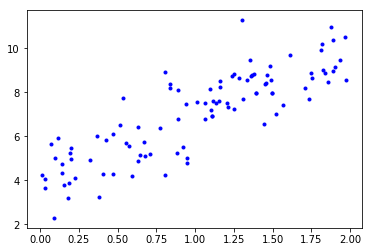

In [2]:
# Data Preparation
X = 2 * np.random.rand(100,1)
X_b = np.c_[np.ones((100,1)), X]
y = 4 + 3*X + np.random.randn(100,1)  #y = 3x + 4  +guassian noise

# Plot the data
plt.plot(X,y, "b.")

In [3]:
def showProgress(i, X, y, theta):
    """
    Helper function to show progress by (a) printing current theta and (b) plotting current
    regression
    """
    print("Theta (i=" + str(i+1) + "): " + str(theta))
    
    # Predict on x=0 and x=2
    X_new = np.array([[0],[2]])
    X_new_b = np.c_[np.ones((2,1)), X_new] # [[1,0][1,2]]
    y_predict = X_new_b.dot(theta)
    
    # Plot prediction
    plt.plot(X_new, y_predict)
    if (i==0): 
        plt.plot(X,y, "b.")

In [4]:
#####################################################################
#####################################################################

# Linear Regression

## Linear Regression - Closed-Form Solution

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline 

Theta (i=1): [[4.04110018]
 [2.95196836]]


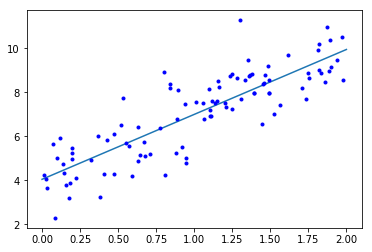

In [6]:
# Solve normal equation for theta
theta = np.linalg.inv( X_b.T.dot(X_b) ).dot(X_b.T).dot(y)

showProgress(0, X, y, theta)

In [7]:
# Predictions based upon theta
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]
y_predict = X_new_b.dot(theta)

print(y_predict)

[[4.04110018]
 [5.51708436]
 [6.99306854]
 [8.46905272]
 [9.9450369 ]]


In [8]:
#####################################################################

## Linear Regression using Scikit-Learn

Theta (i=1): [array([4.04110018]), array([[2.95196836]])]


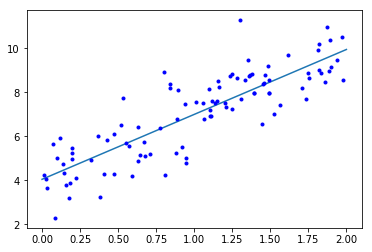

In [9]:
#  Create a linear regression and train it
lin_reg = LinearRegression()
lin_reg.fit(X,y)

theta = [lin_reg.intercept_, lin_reg.coef_]
showProgress(0, X, y, theta)

In [10]:
# Make a prediction using trained model
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]
y_predict = lin_reg.predict(X_new)

print(y_predict)

[[4.04110018]
 [5.51708436]
 [6.99306854]
 [8.46905272]
 [9.9450369 ]]


In [11]:
#####################################################################

## Batch Linear Regression

Theta (i=1): [[ 2.40009164]
 [-0.8606666 ]]
Theta (i=1): [[3.49849892]
 [0.49689157]]
Theta (i=2): [[4.10297901]
 [1.26721178]]
Theta (i=3): [[4.43094763]
 [1.70811095]]
Theta (i=4): [[4.60425473]
 [1.96410165]]
Theta (i=5): [[4.69118671]
 [2.11619   ]]
Theta (i=6): [[4.73000832]
 [2.20978704]]
Theta (i=7): [[4.7421577 ]
 [2.27035286]]
Theta (i=8): [[4.73964205]
 [2.31216494]]
Theta (i=9): [[4.72918291]
 [2.3432328 ]]
Theta (i=10): [[4.71453946]
 [2.36805261]]
Theta (i=11): [[4.69781075]
 [2.38915113]]
Theta (i=12): [[4.68016559]
 [2.40795107]]


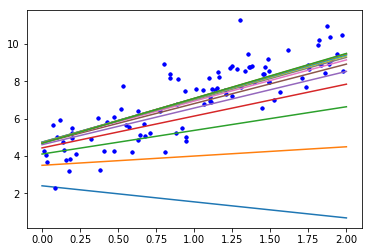

In [12]:
# Set algorithm parameters
eta = 0.1 
n_iterations = 10000
m = (len(X)) # number of inputs
epsilon = 0.00001

# Initialize Linear Model's parameters
theta = np.random.randn(2,1)
showProgress(0, X, y, theta)

# Train Linear Model
for i in range(0,n_iterations):
    
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)  # 2/m * XT.(X.theta - y)

    if np.mean(-gradients) < epsilon:
        break
    
    theta = theta - eta * gradients
    
    showProgress(i, X, y, theta)

In [13]:
# Predictions based upon theta
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new] 

y_predict = X_new_b.dot(theta)
print(y_predict)

[[4.68016559]
 [5.88414112]
 [7.08811666]
 [8.2920922 ]
 [9.49606773]]


In [14]:
#####################################################################

## Stochastic Gradient Descent

In [15]:
# Learning Schedule
t0, tn = 5, 50
def learning_schedule(t):
    return t0 / (t + tn)

Theta (i=1): [[ 1.56978483]
 [-0.80855102]]
Theta (i=1): [[4.31581187]
 [2.7019603 ]]
Theta (i=2): [[3.96567076]
 [2.85069662]]
Theta (i=3): [[4.01439776]
 [3.13971376]]
Theta (i=4): [[4.06784654]
 [3.10124845]]
Theta (i=5): [[4.00892363]
 [2.81395303]]
Theta (i=6): [[3.95149086]
 [2.93660104]]
Theta (i=7): [[4.09868043]
 [3.07030752]]
Theta (i=8): [[4.19767381]
 [3.04230143]]
Theta (i=9): [[4.00744994]
 [2.92329102]]
Theta (i=10): [[3.94597129]
 [2.93498877]]
Theta (i=11): [[4.0162433 ]
 [3.09349187]]
Theta (i=12): [[3.9594933 ]
 [3.01361528]]
Theta (i=13): [[4.03747866]
 [3.11798279]]
Theta (i=14): [[3.98339571]
 [3.05169668]]
Theta (i=15): [[3.99188902]
 [3.04980484]]
Theta (i=16): [[4.00354005]
 [3.06219372]]
Theta (i=17): [[3.97368725]
 [3.04875994]]
Theta (i=18): [[3.95981147]
 [2.98330951]]
Theta (i=19): [[3.99407736]
 [3.02102087]]
Theta (i=20): [[3.99705911]
 [3.01496955]]
Theta (i=21): [[4.06943355]
 [3.13107014]]
Theta (i=22): [[3.97246915]
 [3.05542435]]
Theta (i=23): [[3.9

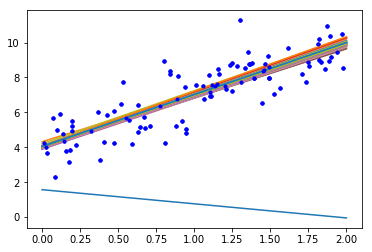

In [16]:
# Set loop
n_epochs = 50
m = (len(X)) # number of inputs

# Initialize Linear Model's parameters
theta = np.random.randn(2,1)
showProgress(0, X, y, theta)


# Train Linear Model
for epoch in range(0, n_epochs):
    for i in range(0,m):
    
        rand_idx = np.random.randint(m)
        xi = X_b[rand_idx:rand_idx+1]
        yi = y[rand_idx:rand_idx+1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # 2 * XT.(X.theta - y)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
        
    showProgress(epoch, X, y, theta)

plt.plot(X,y, "b.")

In [17]:
# Predictions based upon theta
# Data
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]

# Prediction
y_predict = X_new_b.dot(theta)
print(y_predict)

[[4.04725904]
 [5.53311208]
 [7.01896511]
 [8.50481815]
 [9.99067119]]


In [18]:
#####################################################################

## Mini-Batch Gradient Descent

In [19]:
# Learning Schedule
t0, tn = 5, 50
def learning_schedule(t):
    return t0 / (t + tn)

Theta (i=1): [[ 0.71526415]
 [-0.18273002]]
Theta (i=1): [[3.95408351]
 [3.06394176]]
Theta (i=2): [[4.0245463 ]
 [2.97190751]]
Theta (i=3): [[3.99055757]
 [3.04761113]]
Theta (i=4): [[4.04056785]
 [3.02398877]]
Theta (i=5): [[4.03573726]
 [2.9859876 ]]
Theta (i=6): [[4.02827602]
 [3.02178507]]
Theta (i=7): [[4.01188815]
 [2.9945414 ]]
Theta (i=8): [[4.01697159]
 [3.0216415 ]]
Theta (i=9): [[3.99229761]
 [2.98414131]]
Theta (i=10): [[3.98887201]
 [2.98611492]]
Theta (i=11): [[3.96217674]
 [2.97836262]]
Theta (i=12): [[4.00719529]
 [3.00322504]]
Theta (i=13): [[4.00237693]
 [2.96974363]]
Theta (i=14): [[3.98117253]
 [2.96831868]]
Theta (i=15): [[4.00900668]
 [2.97656995]]
Theta (i=16): [[4.02855251]
 [2.97888458]]
Theta (i=17): [[4.0360071 ]
 [2.97380481]]
Theta (i=18): [[4.04590917]
 [2.98386207]]
Theta (i=19): [[4.06346659]
 [2.98865556]]
Theta (i=20): [[4.02306302]
 [2.94158092]]
Theta (i=21): [[4.02674841]
 [2.96774264]]
Theta (i=22): [[4.01692858]
 [2.95806589]]
Theta (i=23): [[4.0

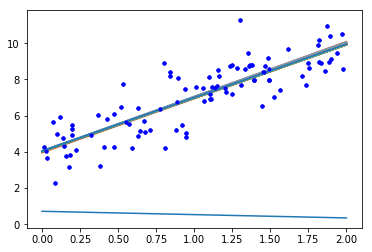

In [20]:
# Set loop
n_epochs = 50
m = (len(X)) # number of inputs

# Initialize Linear Model's parameters
theta = np.random.randn(2,1)
showProgress(0, X, y, theta)

batch_size = 5 # b


# Train Linear Model
for epoch in range(0, n_epochs):
    for i in range(0,m):
    
        rand_idx = np.arange(m) #array from 0 to m-1
        np.random.shuffle(rand_idx) #shuffle index arry

        xi = X_b[rand_idx[:batch_size]] #grab labels for first b rows
        yi = y[rand_idx[:batch_size]]   #grab labels for first b rows
        
        gradients = 2/batch_size * xi.T.dot(xi.dot(theta) - yi)  # 2/b * XT.(X.theta - y)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
        
    showProgress(epoch, X, y, theta)

plt.plot(X,y, "b.")

In [21]:
# Predictions based upon theta

# Data
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]

# Prediction
y_predict = X_new_b.dot(theta)
print(y_predict)

[[4.04621884]
 [5.52340117]
 [7.00058349]
 [8.47776582]
 [9.95494814]]


In [22]:
#####################################################################
#####################################################################

# Polynomial Regression

In [23]:
from sklearn.preprocessing import PolynomialFeatures

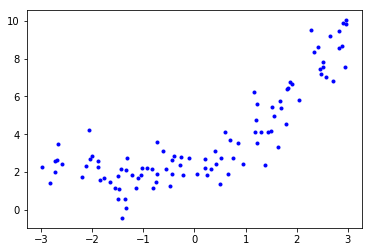

In [24]:
# Sample Training Data
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X,y,"b.")

Trained Theta:
[2.25641063] [[ 0.10388966  1.12703807  1.11339071 -1.01930966 -0.38884841  0.4251183
   0.0509219  -0.06403725 -0.00220408  0.00316277]]


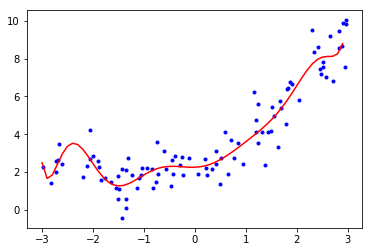

In [25]:
# Adjust degree to observe change in model
degree = 10

# Add extra features using PolynomialFeatures transform
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Train the modified input data set.
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print("Trained Theta:")
print(lin_reg.intercept_, lin_reg.coef_)


# Prepare test data
x_test = [[0.1*x] for x in range(-30,30)]
test_X_poly = poly_features.fit_transform(x_test)

# Predict using test data
predict = lin_reg.predict(test_X_poly)

# Plot Scatter and Model
plt.plot(X,y,"b.")
plt.plot(x_test, predict,"r-")

# Performance Analysis Using Learning Curves

Demonstrated using Polynomial Regression examples.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [27]:
def plot_learning_curves(model, X, y):
    """
    Plots performance on the training set and testing (validation) set.
    X-axis - number of training samples used
    Y-axis - RMSE
    """
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.20)
    
    training_errors, validation_errors = [], []
    
    for m in range(1, len(train_X)):
        
        model.fit(train_X[:m], train_y[:m])
        
        train_pred = model.predict(train_X)
        test_pred = model.predict(test_X)
        
        training_errors.append(np.sqrt(mean_squared_error(train_y, train_pred)))
        validation_errors.append(np.sqrt(mean_squared_error(test_y, test_pred)))
        
    plt.plot(training_errors, "r-+", label="train")
    plt.plot(validation_errors, "b-", label="test")
    plt.axis([0, 80, 0, 3])     

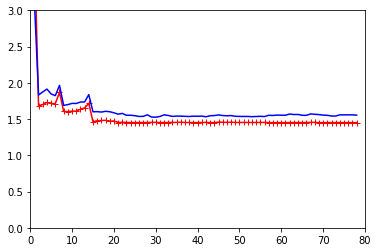

In [28]:
plot_learning_curves(LinearRegression(), X, y)

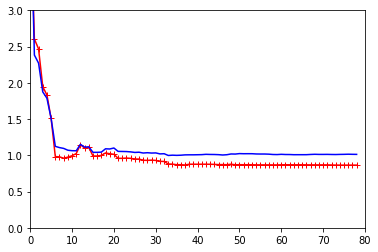

In [29]:
degree = 2

poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
    ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(poly_reg, X, y)

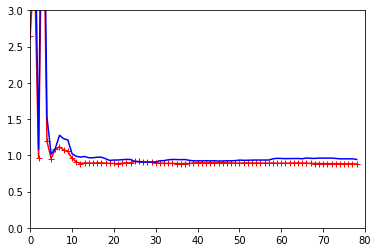

In [30]:
degree = 3

poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
    ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(poly_reg, X, y)

In [31]:
#####################################################################
#####################################################################

# Regularization Techniques

## Ridge Regression

In [38]:
# New Includes
from sklearn.linear_model import Ridge, SGDRegressor

### Demonstration Data Set and Test Inputs

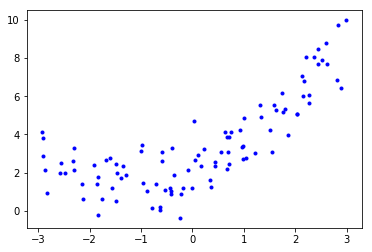

In [33]:
# Sample Training Data
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X,y,"b.")

# Test data - values between -3 to 3 in 0.1 increments
x_test = [[0.1*x] for x in range(-30,30)]

Closed-Form Approach using Ridge class w/ Cholesky solver (formulation of closed form solution for regression with ridge regularization)

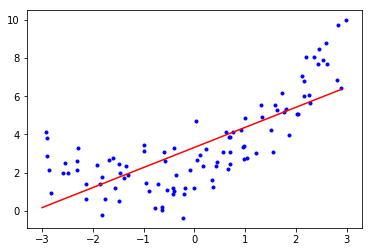

In [34]:
alpha = 0.8

# Build and Train
model = Ridge(alpha=alpha, solver="cholesky")
model.fit(X,y)

# Plot polynomials for each alpha
predict = model.predict(x_test)
plt.plot(X,y,"b.")          
plt.plot(x_test, predict,"r-")

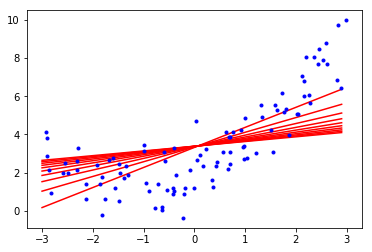

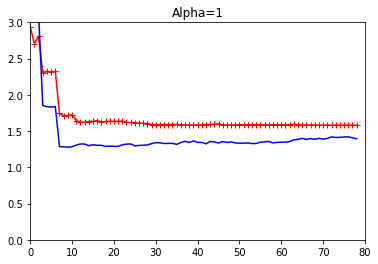

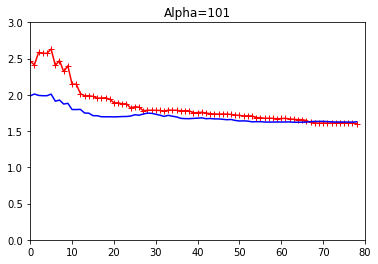

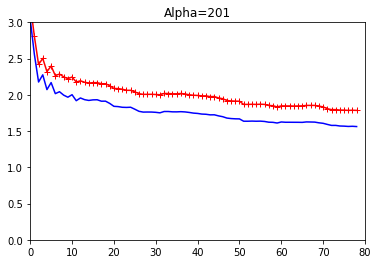

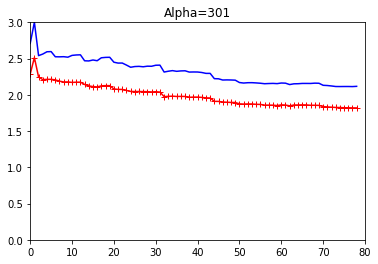

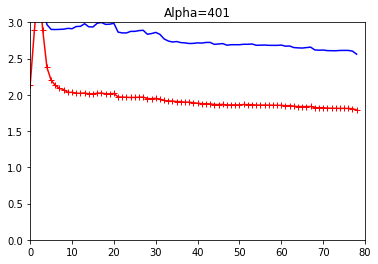

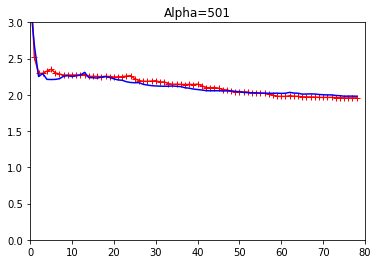

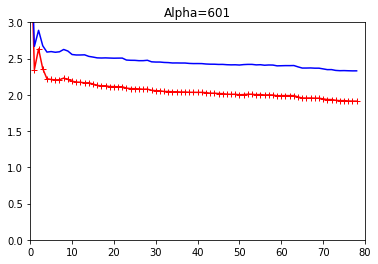

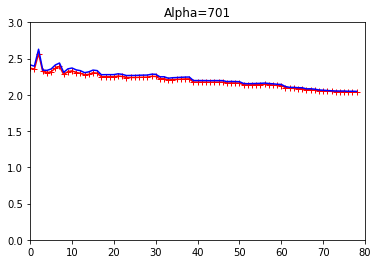

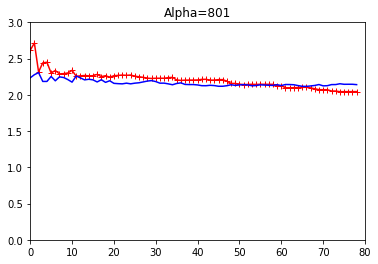

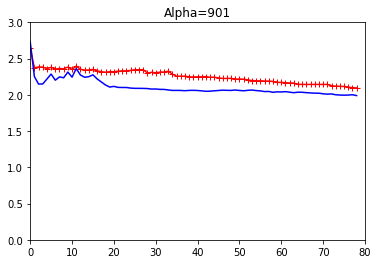

In [35]:
for a in range(0,1000,100):
    
    alpha = (a+1)
    
    model = Ridge(alpha=alpha, solver="cholesky")
    model.fit(X,y.ravel())
    
    plt.figure(0)
    
    # Plot polynomials for each alpha
    predict = model.predict(x_test)
    plt.plot(x_test, predict,"r-")
    
    plt.figure(a+1)
   
    # Plot learning curve for each alpha
    plt.title("Alpha=" + str(alpha))
    plot_learning_curves(model, X, y.ravel())

plt.figure(0)
plt.plot(X,y,"b.")

# Note on Syntax
# Figure 0 - plots curves for each model
# Figure (a+1) - plots the figure for each alpha=(a+1)*0.1
#  By specifying the figure before each plot, we tell matplot
#  lib which plot to update.

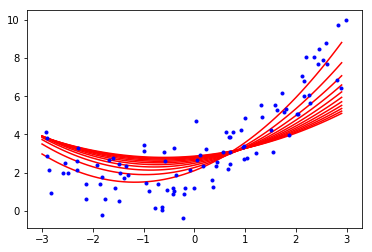

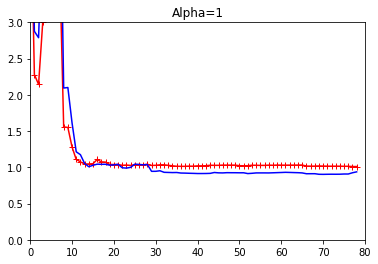

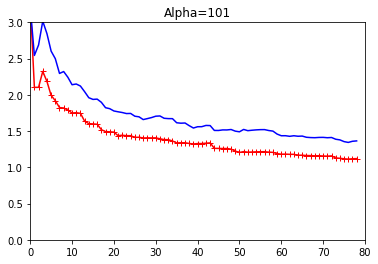

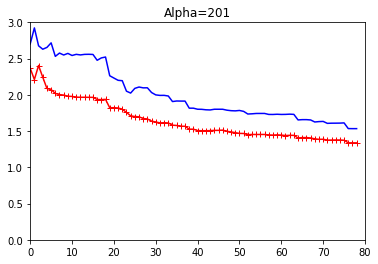

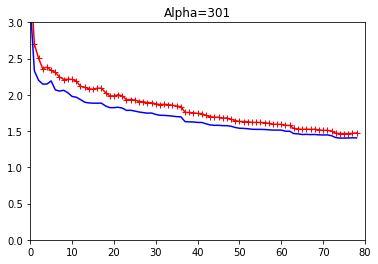

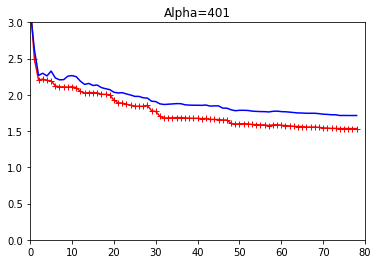

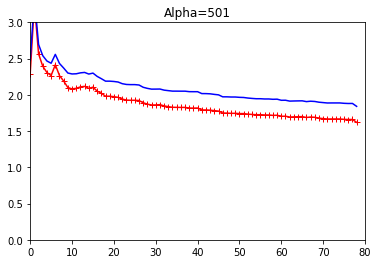

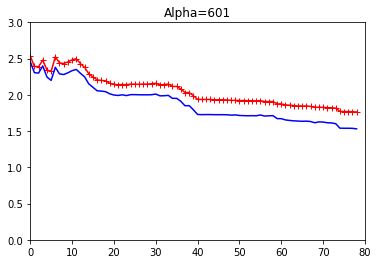

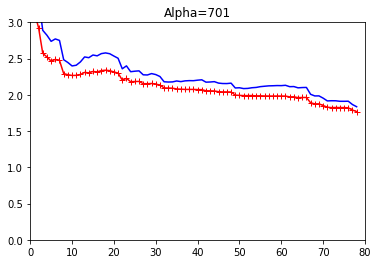

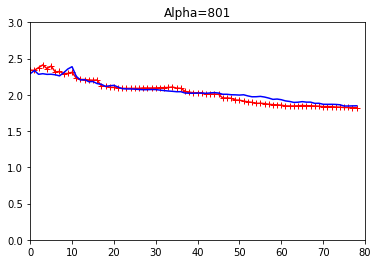

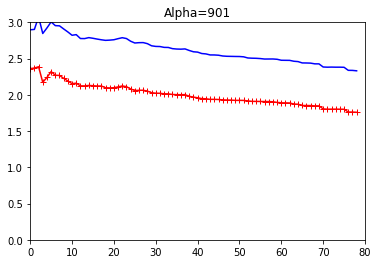

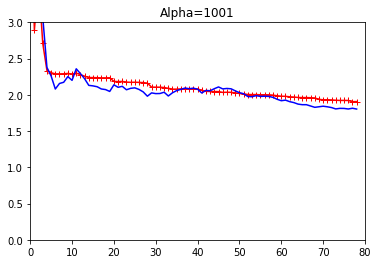

In [36]:
deg = 2
for a in range(0,1001,100):
    
    alpha = a+1
    
    model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
        ("Ridged", Ridge(alpha=alpha, solver="cholesky")),
        ])
    model.fit(X,y.ravel())
    
    plt.figure(0)
    
    # Plot polynomials for each alpha
    predict = model.predict(x_test)
    plt.plot(x_test, predict,"r-")
    
    plt.figure(a+1)
   
    # Plot learning curve for each alpha
    plt.title("Alpha=" + str(alpha))
    plot_learning_curves(model, X, y.ravel())

plt.figure(0)
plt.plot(X,y,"b.")

### Stochastic Gradient Descent w/ Ridge Regression Enabled as L2 penalty

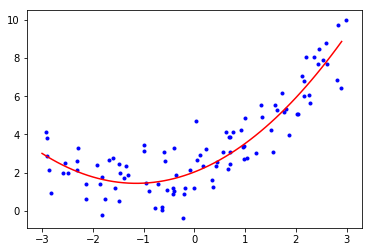

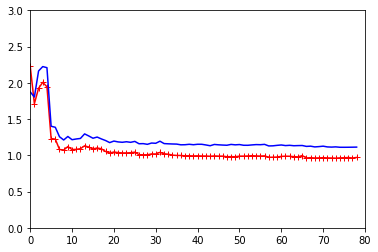

In [40]:
deg = 2

plt.figure(0)
plt.plot(X,y,"b.")
    
# Build Polynomial SGD w/ Lasso Regularization
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("SGD Ridge", SGDRegressor(penalty="l2", max_iter=100000, tol=0.00001)),
    ])
    
model.fit(X,y.ravel())

# Plot polynomials for each alpha
predict = model.predict(x_test)
plt.plot(x_test, predict,"r-")
    
plt.figure(1)
   
plot_learning_curves(model, X, y.ravel())

In [ ]:
#####################################################################

## Lasso Regularization

The following declares the includes for this demonstration.

In [42]:
# Includes
from sklearn.linear_model import Lasso

### Demonstration Data Set and Test Inputs

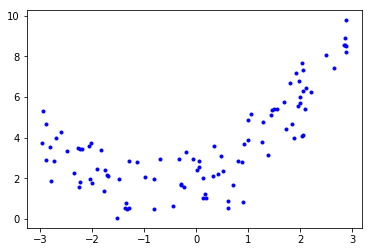

In [43]:
# Sample Training Data
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X,y,"b.")

# Test data - values between -3 to 3 in 0.1 increments
x_test = [[0.1*x] for x in range(-30,30)]

### Lasso Regression - Linear Example

This demonstrates the Linear Regression with Lasso Model using the Lasso class built into SkLearn

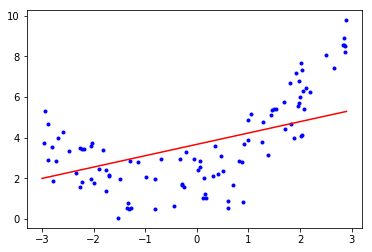

In [44]:
alpha = 0.8

# Build and Train
model = Lasso(alpha=alpha)
model.fit(X,y)

# Plot polynomials for each alpha
predict = model.predict(x_test)
plt.plot(X,y,"b.")          
plt.plot(x_test, predict,"r-")

Let's observe our models and their learning curves across alphas from 0 to 1.

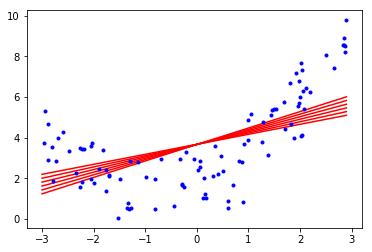

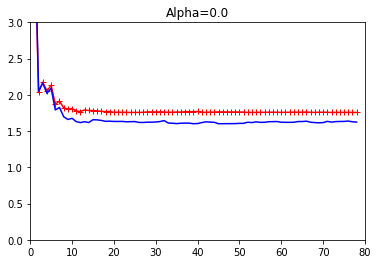

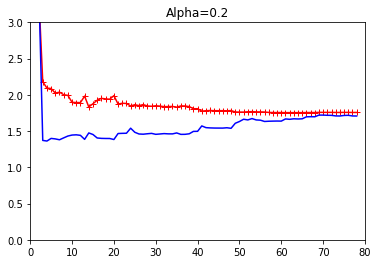

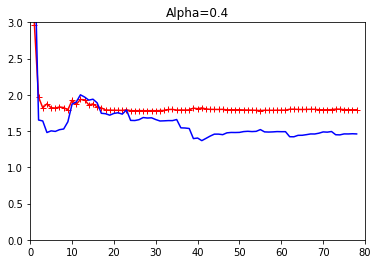

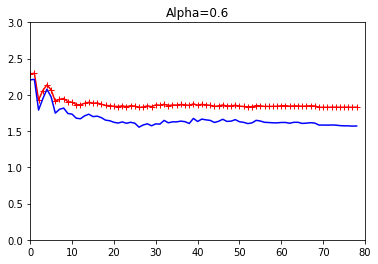

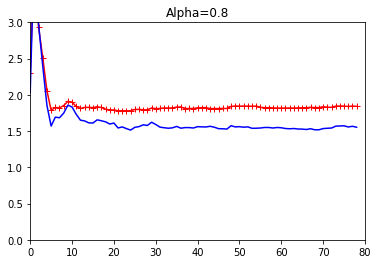

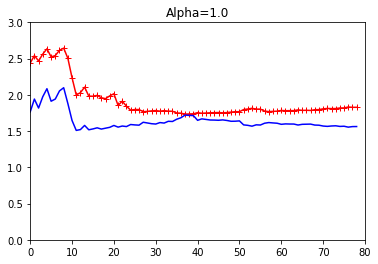

In [45]:
for a in range(0,101,20):
    
    alpha = 0.01*(a+1)
    
    model = Lasso(alpha=alpha)
    model.fit(X,y.ravel())
    
    plt.figure(0)
    
    # Plot polynomials for each alpha
    predict = model.predict(x_test)
    plt.plot(x_test, predict,"r-")
    
    plt.figure(a+1)
   
    # Plot learning curve for each alpha
    plt.title("Alpha=" + str(a*0.01))
    plot_learning_curves(model, X, y.ravel())

plt.figure(0)
plt.plot(X,y,"b.")

# Note on Syntax
# Figure 0 - plots curves for each model
# Figure (a+1) - plots the figure for each alpha=(a+1)*0.1
#  By specifying the figure before each plot, we tell matplot
#  lib which plot to update.

### Lasso Regression - Polynomial Example

Now, we will change our model to a polynomial of a specified degreee.  We can then observe how our model is impacted as alpha is adjusted.

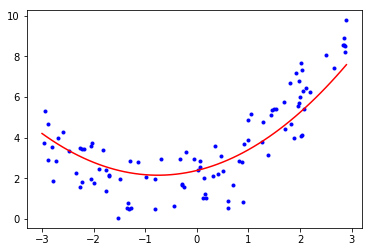

In [46]:
alpha = 0.8
deg = 2

# Build and Train
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("Lasso", Lasso(alpha=alpha)),
    ])
    
model.fit(X,y)

# Plot polynomials for each alpha
predict = model.predict(x_test)
plt.plot(X,y,"b.")          
plt.plot(x_test, predict,"r-")

Let's observe our models and their learning curves across alphas from 0 to 1.

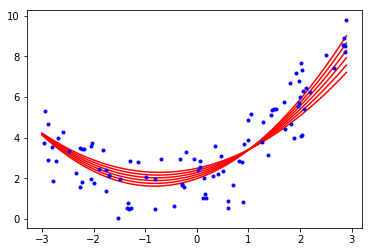

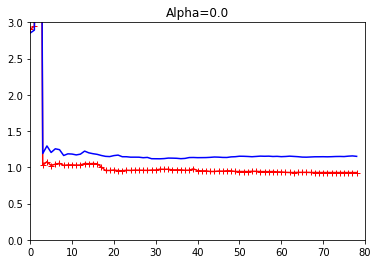

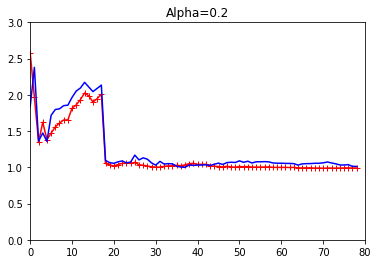

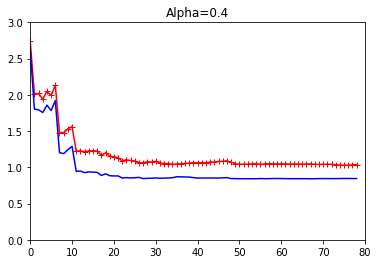

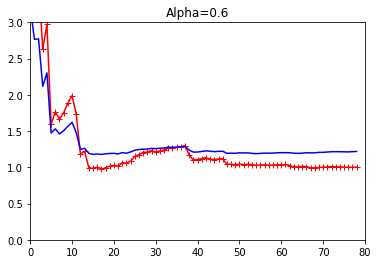

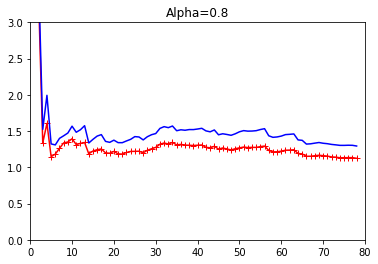

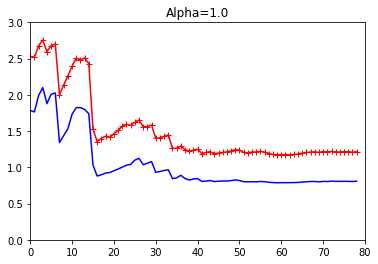

In [47]:
for a in range(0,101,20):
    
    alpha = 0.01*(a+1)
    
    model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("Lasso", Lasso(alpha=alpha)),
    ])
    
    model.fit(X,y.ravel())
    
    plt.figure(0)
    
    # Plot polynomials for each alpha
    predict = model.predict(x_test)
    plt.plot(x_test, predict,"r-")
    
    plt.figure(a+1)
   
    # Plot learning curve for each alpha
    plt.title("Alpha=" + str(a*0.01))
    plot_learning_curves(model, X, y.ravel())
    
plt.figure(0)
plt.plot(X,y,"b.")

### Lasso Regression - Stochastic Gradient Descent Example

Now, we will utilize steepest gradient descent with an l1 penalty to implement our lasso regression.  For our example, we will use a polynomial model.

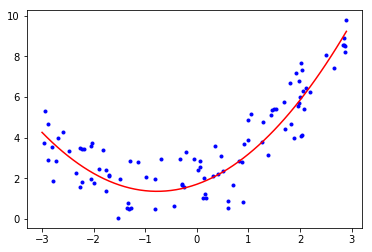

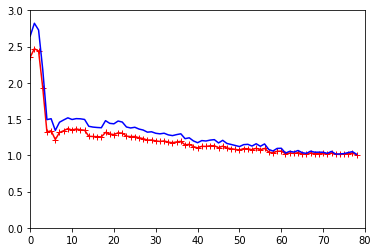

In [48]:
deg = 2

plt.figure(0)
plt.plot(X,y,"b.")
    
# Build Polynomial SGD w/ Lasso Regularization
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("SGD Lasso", SGDRegressor(penalty="l1", max_iter=1000, tol=0.01)),
    ])
    
model.fit(X,y.ravel())

# Plot polynomials for each alpha
predict = model.predict(x_test)
plt.plot(x_test, predict,"r-")
    
plt.figure(1)
   
plot_learning_curves(model, X, y.ravel())

## Demo Boston Data Set

Dataset User Guide: https://scikit-learn.org/stable/datasets/index.html#boston-dataset
Dataset API Info: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston


   * CRIM per capita crime rate by town
   * ZN proportion of residential land zoned for lots over 25,000 sq.ft.
   * INDUS proportion of non-retail business acres per town
   * CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
   * NOX nitric oxides concentration (parts per 10 million)
   * RM average number of rooms per dwelling
   * AGE proportion of owner-occupied units built prior to 1940
   * DIS weighted distances to five Boston employment centres
   * RAD index of accessibility to radial highways
   * TAX full-value property-tax rate per \$10,000
   * PTRATIO pupil-teacher ratio by town
   * B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
   * LSTAT % lower status of the population
   * MEDV Median value of owner-occupied homes in \$1000’s


In [49]:
# New Includes
from sklearn import datasets
from sklearn.metrics import mean_absolute_error
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018DAD3DDD68>,
      dtype=object)

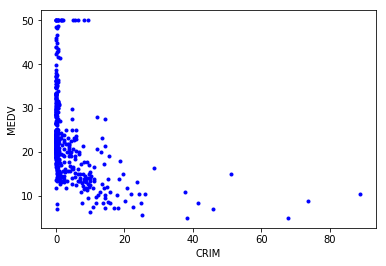

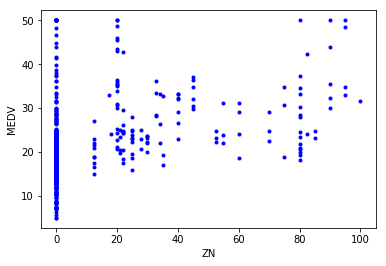

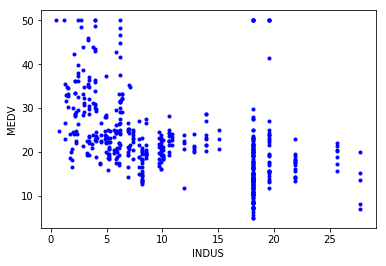

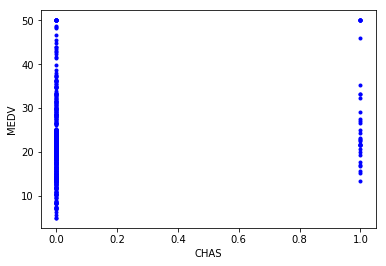

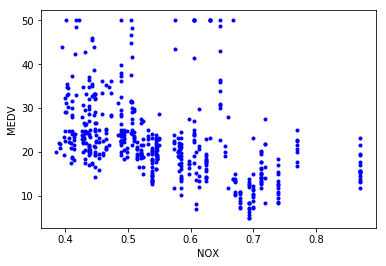

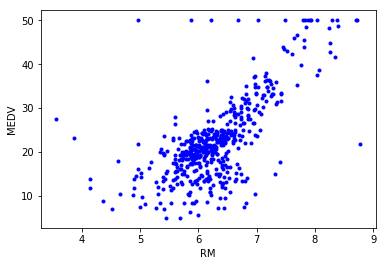

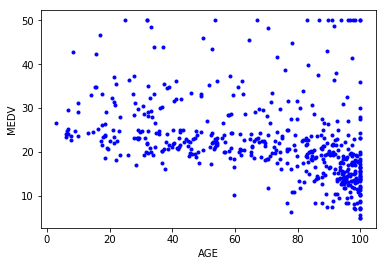

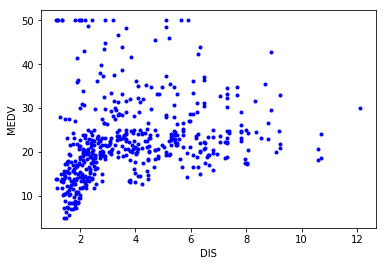

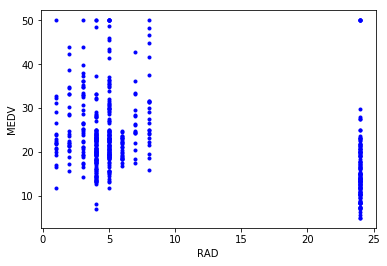

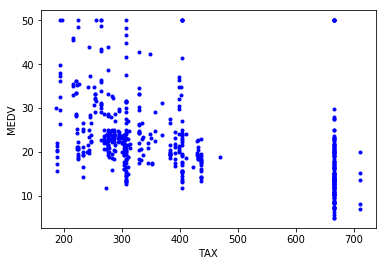

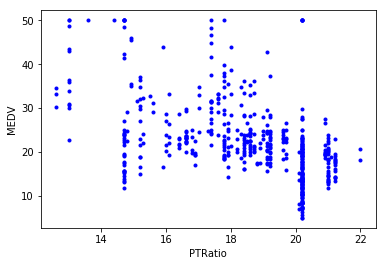

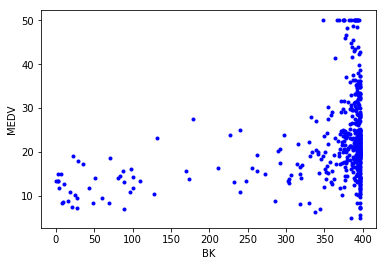

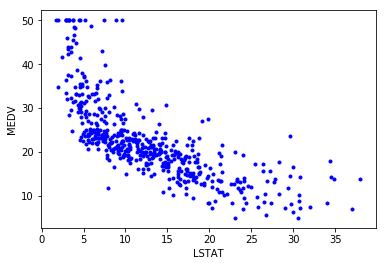

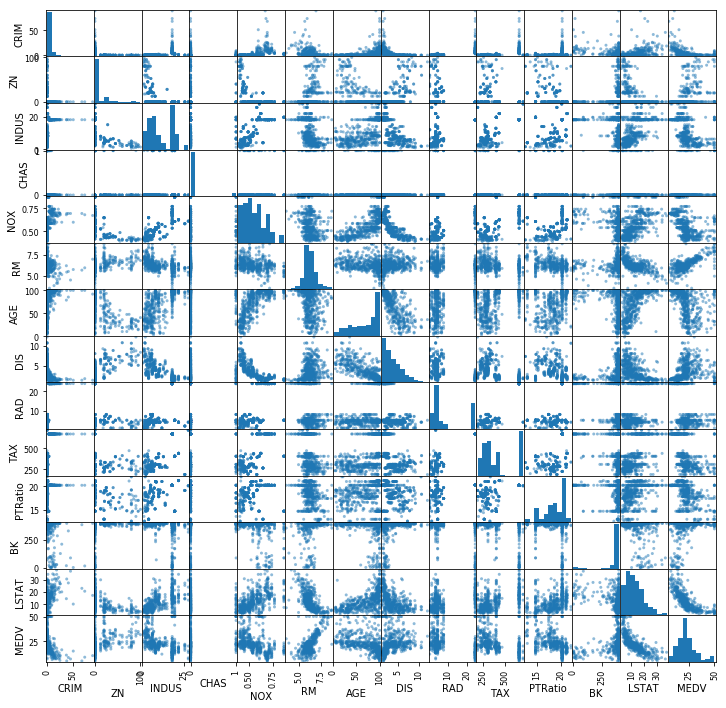

In [50]:
# Load Data Set
boston_housing_data = datasets.load_boston()

# Build data frame for visualization
boston_df = pd.DataFrame(np.c_[boston_housing_data.data, boston_housing_data.target], 
                  columns=["CRIM", "ZN","INDUS","CHAS", "NOX","RM","AGE",
                           "DIS","RAD","TAX","PTRatio","BK", "LSTAT","MEDV"])

# Plot relationship between each attribute and MEDV
for column in boston_df.columns:
    
    if column == "MEDV": continue
    
    plt.figure(column)
    plt.xlabel(column)
    plt.ylabel("MEDV")
    plt.plot(boston_df[column], boston_df["MEDV"], "b.")

scatter_matrix(boston_df, figsize=(12, 12))

In [52]:
# Data Preparation
scaler = StandardScaler()
boston_data_set = scaler.fit_transform(boston_housing_data.data)
train_X, test_X, train_y, test_y = train_test_split(boston_data_set,
                                                   boston_housing_data.target,
                                                   test_size=0.33)

Theta:
22.46670614772384 [-0.73651805  1.08227637  0.1536818   0.84852225 -1.50245603  3.02338339
 -0.45622049 -2.91649729  2.3361285  -2.30016951 -1.74544238  0.98383988
 -3.63381585]
Mean error: 3.552293301765671


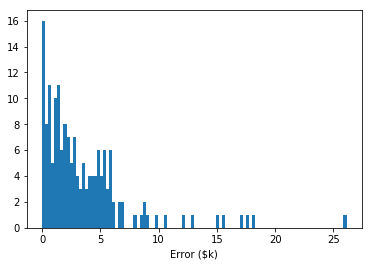

In [53]:
lin_reg = LinearRegression()
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print("Theta:")
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

print("Mean error: " + str(mean_absolute_error(test_y, pred_y)))

22.46670614772384 [-0.73651805  1.08227637  0.1536818   0.84852225 -1.50245603  3.02338339
 -0.45622049 -2.91649729  2.3361285  -2.30016951 -1.74544238  0.98383988
 -3.63381585]


3.552293301765671

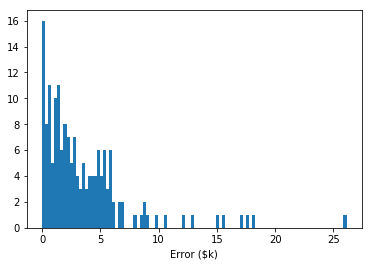

In [54]:
lin_reg = LinearRegression()
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print("Theta:")
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

[22.45099984] [-0.65590025  0.92907205 -0.00669335  0.88524893 -1.36232753  3.07326584
 -0.47086969 -2.85395397  1.69767072 -1.5594743  -1.70633178  0.9731301
 -3.56733626]


3.5074628771682455

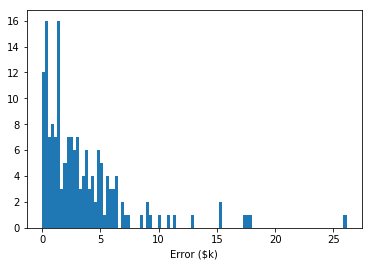

In [55]:
lin_reg = SGDRegressor(penalty="none", max_iter=10000, tol=0.001)
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print("Theta:")
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

[22.46122496] [-0.63603233  0.89534597 -0.08162295  0.9168554  -1.31241869  3.16282337
 -0.51548984 -2.74675255  1.45665778 -1.34827262 -1.73768831  1.00152019
 -3.58753247]


3.5369133697125723

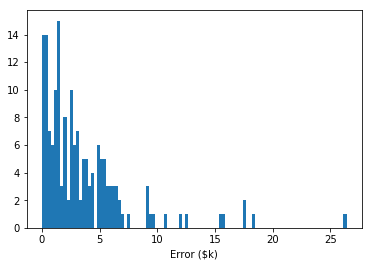

In [56]:
lin_reg = SGDRegressor(penalty="l2", max_iter=10000, tol=0.001)
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print("Theta:")
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

[22.45815934] [-0.62752707  0.87729687 -0.08201725  0.89849953 -1.28719829  3.17737239
 -0.52122216 -2.7033558   1.45992115 -1.38164008 -1.73520786  0.99917543
 -3.59668316]


3.540927866135654

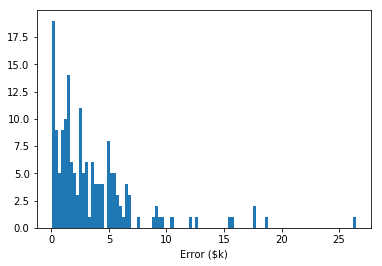

In [57]:
lin_reg = SGDRegressor(penalty="l1", max_iter=10000, tol=0.001)
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print("Theta:")
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

In [58]:
attributes = ["AGE","RM","LSTAT"]

boston_data_set = boston_df[attributes]
boston_data_set = scaler.fit_transform(boston_housing_data.data)
train_X, test_X, train_y, test_y = train_test_split(boston_data_set,
                                                   boston_housing_data.target,
                                                   test_size=0.33)

22.43456706099531 [-0.23808505  0.67857596  0.28163275  0.54189028 -2.14457913  2.66954904
  0.3050034  -2.4720505   2.3001441  -1.97559085 -1.98617481  0.99292409
 -4.09896202]


3.329074410533615

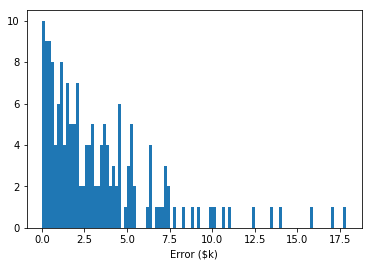

In [59]:
lin_reg = LinearRegression()
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print("Theta:")
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

[22.42160826] [-0.16504528  0.59801132  0.09813052  0.55208217 -2.0283937   2.70511854
  0.25333573 -2.44639278  1.75960418 -1.39921615 -1.94428758  1.01771164
 -4.05132223]


3.317979555575373

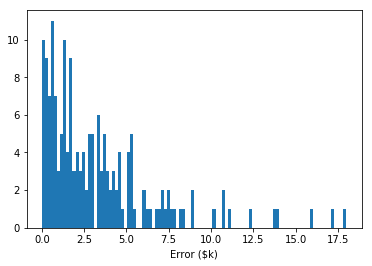

In [60]:
lin_reg = SGDRegressor(penalty="none", max_iter=10000, tol=0.001)
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print("Theta:")
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

Theta:
[22.43472117] [-0.11310221  0.5465578   0.06390498  0.59363723 -1.91917755  2.74018405
  0.22409626 -2.39039089  1.6388178  -1.29254353 -1.9253513   1.01353132
 -4.02781247]


3.3158932406410964

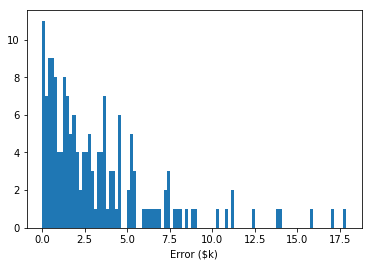

In [63]:
lin_reg = SGDRegressor(penalty="l2", max_iter=10000, tol=0.001)
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print("Theta:")
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

Theta:
[22.46010332] [-0.09689322  0.57117209  0.01072258  0.5553693  -1.87815831  2.75654029
  0.18524194 -2.39157502  1.5283522  -1.23441399 -1.92278954  0.99675851
 -4.00567961]


3.3162271055447037

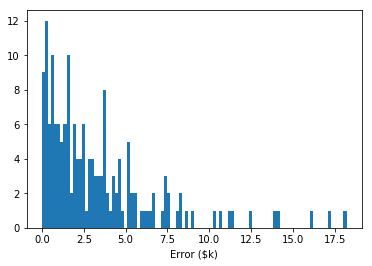

In [64]:
lin_reg = SGDRegressor(penalty="l1", max_iter=10000, tol=0.001)
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print("Theta:")
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)